### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()

df = pdr.get_data_yahoo("LICI.NS")

[*********************100%***********************]  1 of 1 completed


In [2]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,865.802429,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,866.890564,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,831.773743,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,817.232422,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,808.032776,12444648
...,...,...,...,...,...,...
2024-03-26,909.099976,918.000000,892.200012,897.450012,897.450012,3883441
2024-03-27,900.950012,913.000000,888.950012,892.500000,892.500000,7788410
2024-03-28,902.650024,928.000000,901.750000,916.150024,916.150024,4191452


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-17,872.000000,918.950012,860.000000,875.250000,865.802429,48792877
2022-05-18,885.549988,891.000000,874.099976,876.349976,866.890564,8919761
2022-05-19,867.000000,867.000000,838.000000,840.849976,831.773743,7372427
2022-05-20,848.549988,856.799988,825.000000,826.150024,817.232422,7078291
2022-05-23,826.150024,852.700012,803.650024,816.849976,808.032776,12444648


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-26,909.099976,918.000000,892.200012,897.450012,897.450012,3883441
2024-03-27,900.950012,913.000000,888.950012,892.500000,892.500000,7788410
2024-03-28,902.650024,928.000000,901.750000,916.150024,916.150024,4191452
2024-04-01,925.000000,984.450012,924.000000,970.599976,970.599976,4863536
2024-04-02,972.650024,1001.799988,961.299988,998.400024,998.400024,5915915


In [5]:
df1=df.reset_index()['Close']

In [6]:
df1

0      875.250000
1      876.349976
2      840.849976
3      826.150024
4      816.849976
          ...    
460    897.450012
461    892.500000
462    916.150024
463    970.599976
464    998.400024
Name: Close, Length: 465, dtype: float64

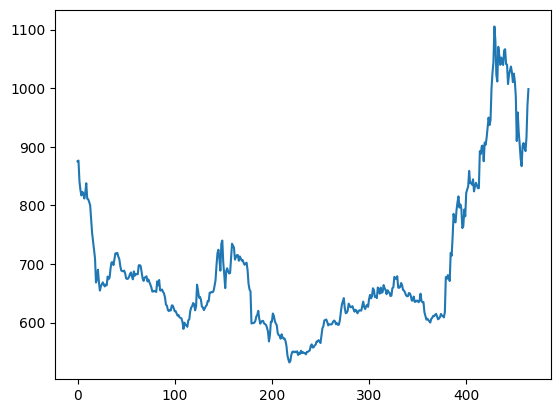

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [9]:
import numpy as np

In [10]:
df1

0      875.250000
1      876.349976
2      840.849976
3      826.150024
4      816.849976
          ...    
460    897.450012
461    892.500000
462    916.150024
463    970.599976
464    998.400024
Name: Close, Length: 465, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
print(df1)

[[0.59888387]
 [0.60080221]
 [0.5388908 ]
 [0.51325434]
 [0.49703521]
 [0.5079351 ]
 [0.50305197]
 [0.48796658]
 [0.50531913]
 [0.5334845 ]
 [0.48735612]
 [0.4857866 ]
 [0.47758986]
 [0.46808513]
 [0.42814787]
 [0.38568192]
 [0.35960935]
 [0.33109527]
 [0.31016747]
 [0.23787935]
 [0.24843043]
 [0.27607262]
 [0.23979769]
 [0.21398676]
 [0.22593311]
 [0.23256022]
 [0.2384897 ]
 [0.23247304]
 [0.2263691 ]
 [0.23186259]
 [0.22933379]
 [0.25575518]
 [0.2477329 ]
 [0.25252885]
 [0.27982212]
 [0.29787241]
 [0.29839559]
 [0.28985003]
 [0.30737704]
 [0.32499133]
 [0.32394488]
 [0.32612486]
 [0.31470179]
 [0.30807467]
 [0.28714687]
 [0.27380536]
 [0.27179984]
 [0.2715382 ]
 [0.27345665]
 [0.26525991]
 [0.25026159]
 [0.2485176 ]
 [0.24947688]
 [0.25453437]
 [0.26342875]
 [0.26796306]
 [0.25540636]
 [0.24738408]
 [0.27118939]
 [0.25837115]
 [0.26290546]
 [0.26299275]
 [0.26255675]
 [0.2891525 ]
 [0.28967567]
 [0.28671088]
 [0.26874787]
 [0.25017441]
 [0.24284966]
 [0.25183121]
 [0.25462154]
 [0.25

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
training_size,test_size

(302, 163)

In [15]:
train_data

array([[0.59888387],
       [0.60080221],
       [0.5388908 ],
       [0.51325434],
       [0.49703521],
       [0.5079351 ],
       [0.50305197],
       [0.48796658],
       [0.50531913],
       [0.5334845 ],
       [0.48735612],
       [0.4857866 ],
       [0.47758986],
       [0.46808513],
       [0.42814787],
       [0.38568192],
       [0.35960935],
       [0.33109527],
       [0.31016747],
       [0.23787935],
       [0.24843043],
       [0.27607262],
       [0.23979769],
       [0.21398676],
       [0.22593311],
       [0.23256022],
       [0.2384897 ],
       [0.23247304],
       [0.2263691 ],
       [0.23186259],
       [0.22933379],
       [0.25575518],
       [0.2477329 ],
       [0.25252885],
       [0.27982212],
       [0.29787241],
       [0.29839559],
       [0.28985003],
       [0.30737704],
       [0.32499133],
       [0.32394488],
       [0.32612486],
       [0.31470179],
       [0.30807467],
       [0.28714687],
       [0.27380536],
       [0.27179984],
       [0.271

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 3
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(298, 3)
(298,)


(None, None)

In [19]:

print(ytest)


[0.21573074 0.19497741 0.19550058 0.19157662 0.22322985 0.21616674
 0.20474367 0.22288114 0.20744682 0.20980126 0.23029306 0.22113715
 0.21564356 0.20317404 0.21512039 0.20936527 0.20788282 0.19785491
 0.19863973 0.22104987 0.22349149 0.25488318 0.25156957 0.24816889
 0.25671435 0.22288114 0.22227068 0.22488665 0.23657136 0.22994425
 0.2159052  0.21398676 0.20831881 0.20020935 0.19724456 0.19724456
 0.20657483 0.20561566 0.19794209 0.18416469 0.18468786 0.19619811
 0.18041508 0.1807639  0.18399023 0.18390305 0.17928156 0.18364151
 0.20465649 0.18268224 0.17936873 0.17980473 0.14928502 0.13812349
 0.12757241 0.13045003 0.12617725 0.12277646 0.1188525  0.12975239
 0.13289154 0.13873395 0.13768749 0.14213463 0.14466343 0.13672832
 0.12853158 0.13071156 0.13507152 0.14440189 0.13978029 0.13786196
 0.13411235 0.14972102 0.25427283 0.24843043 0.25994078 0.25749916
 0.24250095 0.3263865  0.31775376 0.37347404 0.4422742  0.41960242
 0.41698644 0.45326127 0.47645623 0.49424488 0.46093484 0.4705

In [20]:
print(X_test.shape), print(ytest.shape)

(159, 3)
(159,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape((X_train.shape[0], time_step, 1))

# reshape X_test to match the input shape of the model
X_test = X_test.reshape((X_test.shape[0], time_step, 1))

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_step,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 50)             10400     
                                                                 
 lstm_1 (LSTM)               (None, 3, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


5/5 [==============================] - 6s 292ms/step - loss: 0.0429 - val_loss: 0.2166
Epoch 2/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0292 - val_loss: 0.1707
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0160 - val_loss: 0.1152
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0088 - val_loss: 0.0687
Epoch 5/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0107 - val_loss: 0.0644
Epoch 6/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0088 - val_loss: 0.0813
Epoch 7/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0076 - val_loss: 0.0911
Epoch 8/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0076 - val_loss: 0.0842
Epoch 9/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0066 - val_loss: 0.0612
Epoch 10/100
5/5 [==============================] - 0s 21ms/step - loss: 0.0054 - val_loss: 0.0412
Epoch 11/100
5/5 [============

In [26]:
import tensorflow as tf

In [27]:
tf.__version__

'2.12.0-rc1'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

5/5 [==============================] - 0s 4ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

646.7618641431925

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

763.4499326184156

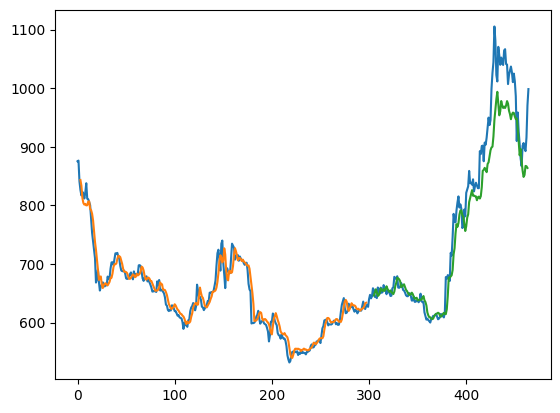

In [32]:
# ### Plotting 
# # shift train predictions for plotting
# look_back=100
# trainPredictPlot = numpy.empty_like(df1)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# # shift test predictions for plotting
# testPredictPlot = numpy.empty_like(df1)
# testPredictPlot[:, :] = numpy.nan
# testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# # plot baseline and predictions
# plt.plot(scaler.inverse_transform(df1))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()
### Plotting 
# shift train predictions for plotting
# shift train predictions for plotting
look_back = 3
trainPredictPlot = np.full((len(df1), 1), np.nan)
train_predict_len = len(X_train) - look_back
trainPredictPlot[look_back:look_back+train_predict_len, :] = train_predict[:train_predict_len]
# shift test predictions for plotting
testPredictPlot = np.full((len(df1), 1), np.nan)
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = np.resize(test_predict, (max(0, (len(df1)-1)-(len(train_predict)+(look_back*2)+1)), 1))

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()






In [33]:
len(test_data)

163

In [38]:
163-3

160

In [64]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
x_input.shape


(1, 3)

In [65]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [66]:
temp_input

[0.6702128225767479, 0.7651726217632155, 0.8136554394201085]

In [67]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=3
i=0
while(i<10):
    
    if(len(temp_input)>3):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)



[0.63713056]
4
1 day input [0.76517262 0.81365544 0.63713056]
1 day output [[0.67140454]]
2 day input [0.81365544 0.63713056 0.67140454]
2 day output [[0.6545074]]
3 day input [0.63713056 0.67140454 0.6545074 ]
3 day output [[0.58748835]]
4 day input [0.67140454 0.6545074  0.58748835]
4 day output [[0.5920338]]
5 day input [0.6545074  0.58748835 0.5920338 ]
5 day output [[0.5691129]]
6 day input [0.58748835 0.5920338  0.5691129 ]
6 day output [[0.53866947]]
7 day input [0.5920338  0.5691129  0.53866947]
7 day output [[0.5321016]]
8 day input [0.5691129  0.53866947 0.53210157]
8 day output [[0.5135424]]
9 day input [0.53866947 0.53210157 0.51354241]
9 day output [[0.49623582]]
[[0.6371305584907532], [0.6714045405387878], [0.6545073986053467], [0.5874883532524109], [0.5920338034629822], [0.5691128969192505], [0.5386694669723511], [0.532101571559906], [0.5135424137115479], [0.49623581767082214]]


In [68]:
# day_new=np.arange(1,101)
# day_pred=np.arange(101,131)
day_new = np.arange(1, 4)
day_pred = np.arange(4, 14)

In [44]:
import matplotlib.pyplot as plt

In [69]:
len(df1)


465

In [47]:
465-3

462

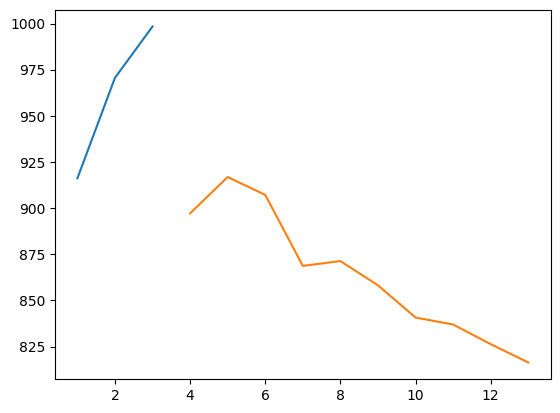

In [70]:
# plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
# plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-time_step:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


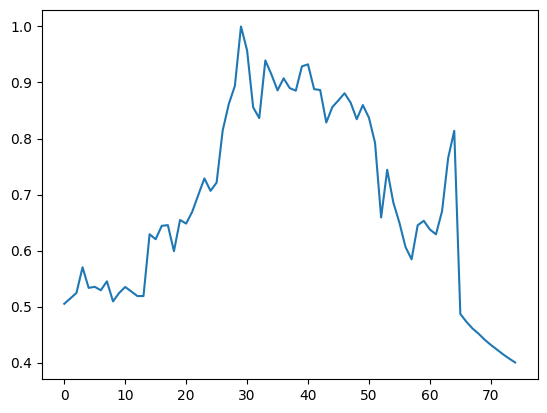

In [62]:
# the full view of the stock chart including the predicted days(lst_output)
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1:])

In [51]:
df3=scaler.inverse_transform(df3).tolist()

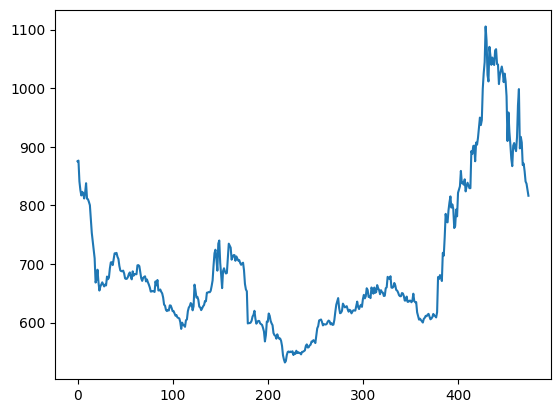

In [52]:
plt.plot(df3)